<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Regresión Lineal Multivariado: PLS</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Regresión Lineal Multivariado
<font color=black> La regresión lineal múltiple permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta (Y) se determina a partir de un conjunto de variables independientes llamadas predictores $(X_1, X_2, X_3…)$. Es una extensión de la regresión lineal simple, por lo que es fundamental comprender esta última. Los modelos de regresión múltiple pueden emplearse para predecir el valor de la variable dependiente o para evaluar la influencia que tienen los predictores sobre ella (esto último se debe analizar con cautela para no malinterpretar causa-efecto).

<font color=black> Los modelos lineales múltiples siguen la siguiente ecuación:
$$y_i= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} +\epsilon_i$$
 
<font color=black> En este caso, se está haciendo referencia al valor de $y$  para una observación $i$  concreta. El valor de una observación puntual nunca va a ser exactamente igual al promedio, de ahí que se añada el término de error  $ϵ$.

<font color=black> Computacionalmente, estos cálculos son más eficientes si se realizan de forma matricial:
$$\mathbf{y}=\mathbf{X}^T \mathbf{\beta}+\epsilon$$

<font color=black> $$\mathbf{y}=\begin{bmatrix} y_1\\  y_2\\  ...\\ y_n\end{bmatrix} \ , \ \ \ \mathbf{X}=\begin{bmatrix} 1 & x_{11} & ... & x_{1p}\\  1 & x_{21} & ... & x_{2p}\\  1 & ... &  ... & ... \\  1 &  x_{n1} & ... &x_{np}\\   \end{bmatrix} \ , \ \ \ \mathbf{\beta}=\begin{bmatrix} \beta_0\\ \beta_1\\  ...\\ \beta_n\end{bmatrix} \ , \ \ \ \mathbf{\epsilon}=\begin{bmatrix} \epsilon_1\\ \epsilon_2\\  ...\\ \epsilon_n\end{bmatrix}$$
    
<font color=black> $$\hat{\beta} = \underset{\beta}{\arg\min} (\mathbf{y} - \mathbf{X}^T \mathbf{\beta})^2$$
    
<font color=black> Una vez estimados los coeficientes, se pueden obtener las estimaciones de cada observación ($\hat{y}_i$):
$$\hat{y}_i= \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + ... + \hat{\beta}_p x_{ip}$$

<font color=black> Finalmente, la estimación de la varianza del modelo ($\hat{σ}^2$) se obtiene como:
$$\hat{\sigma}^2 = \frac{\sum^n_{i=1} \hat{\epsilon}_i^2}{n-p} = \frac{\sum^n_{i=1} (y_i - \hat{y}_i)^2}{n-p}$$

<font color=black> donde $n$  es el número de observaciones y $p$  el número de predictores.

In [1]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Métricas de la Regresión Lineal Multivariado
<font color=black> El módulo sklearn.metrics tiene implementadas varias métricas estadísticas que permiten medir el rendimiento (o 'robustes') de la regresión. Algunas de ellas han sido mejoradas para manejar el caso de multi-salidas, están son:  **Error cuadrático medio (mean_squared_error), Error medio absoluto (mean_absolute_error), Variancia explicada (explained_variance_score) and Coeficiente de regresión (r2_score)**.

In [24]:
datafile="C:/Users/usuario/Documents/propiedad_1.xls"#este archivo contiene tres hojas de calculo 
data = pd.read_excel(datafile, sheet_name=None, header=0)
datacc=data['calibracion']
yprop=datacc['Measured']
ypred=datacc['Predicted']
data['calibracion'].head()

,Predicted,Measured
0,8.876835,8.964832
1,6.577969,6.600000
2,8.027663,8.200000
3,6.401841,6.300000
4,7.413652,7.354888


<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Variancia explicada (explained_variance_score)
<font color=black> Esta métrica compara la salidad estimada con la respuesta correcta a partir de la siguiente relación:
$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$
Cuando el valor está cercano uno se entiende que la regresión presenta un buen rendimiento, lo contrario, valores cercanos a cero, indica un mal rendimiento del modelo.

In [3]:
from sklearn.metrics import explained_variance_score
explained_variance_score(yprop, ypred)
#explained_variance_score(y_true, y_pred, multioutput='raw_values')
#explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7])

0.9979061829168103

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error Máximo (Max Error)
<font color=black> La función de máximo error calcula el máximo error residual, esta métrica captura el peor error entre la medida y la propiedad.
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el máximo error está definido por:
$$\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)$$

In [4]:
from sklearn.metrics import max_error
max_error(yprop, ypred)

0.34735613298853973

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error absoluto promedio (mean_absolute_error)
<font color=black> La función mean_absolute_error calcula el error absoluto medio y corresponde a una métrica que evalua el riesgo de error del modelo. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error absoluto medio (MAE) sobre un numero de muestras $n_{samples}$ está definido por:
$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$

In [5]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yprop, ypred)
#mean_absolute_error(yprop, Y_pred, multioutput='raw_values')

0.08440645368976418

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error cuadrático medio (mean_squared_error)
<font color=black> La función mean_squared_error calcula el error cuadrático medio y corresponde a una métrica que evalua el riesgo de error del modelo. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error cuadrático medio (MSE) sobre un número de muestras $n_{samples}$ está definido por:
$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$$

In [6]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yprop, ypred)

0.01168994115149349

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error logarítmico cuadrático medio (mean_squared_log_error)
<font color=black> La función mean_squared_log_error calcula el error logarítmico cuadrático medio y corresponde a una métrica que evalua el riesgo de error del modelo, especialmente cuando la respuesta tiene un crecimiento exponencial con la variable independiente o predictores. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error logarítmico cuadrático medio (MSLE) sobre un número de muestras $n_{samples}$ está definido por:
$$\text{MSLE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2$$

In [7]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(yprop, ypred)

0.0002272178874529681

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Coeficiente de determinación (r2_score)
<font color=black> El coeficiente de determinación, que puntualiza la regresión, conocido com $R^2$, representa la proporción de varianza (de $y$) que ha sido explicada por la(s) variables independientes del modelo.  Por ello esta métrica provee una buena indicación del ajuste y por lo tanto, es una medida de que tan probable es que el modelo prediga las muestras desconocidas, a través de la proporción de la varianza explicada. $R^2$ con valores cercanos a 1 (incluso negativo) indica un mejor ajuste del modelo y por el contrario su cercanía a cero indicaría lo contrario.
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces la estimación del $R^2$ sobre un número de $n_{samples}$ muestras, está definido por:
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

<font color=black> Donde $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ y $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \epsilon_i^2$

In [8]:
from sklearn.metrics import r2_score

r2_score(yprop, ypred)

0.9979061828979205

**<font color=blue> Vamos  atilizar para este ejemplo dos archivos en formato de Matlab que contienen (espectros.mat), el primero, las intensidades de espectros FTIR de 82 crudos colombianos y el segundo (propiedad.mat) el valor medido de una propiedad de dichos crudos.** 

In [4]:
espectros = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/espectros.mat')# este archivo contiene las intensidades de
# 82 espectros FTIR de crudos colombianos y será utilizados como ejemplo en esta sección
# del curso
propiedad = scipy.io.loadmat('C:/Users/Enrique Mejia/Documents/Análisis_Interpretación_Datos/Datos/propiedad.mat')#Medida de asci de los crudos a los que corresponden los espectros
#ftir

<p style="text-align:justify"><div class="alert alert-success">

**<font color=black> Scikit Learn es la biblioteca favorita en Python para realizar muchas operaciones en Machine Learning especialmente porque contiene varios métodos de tratamiento de datos entre ellos se destacan los métodos para dividir los datos en el conjunto de entrenamiento, pruebas y validación. Los más populares son:**
- **train_test_split - crea una sola división en un set de entranamiento y un set de prueba.**
- **Kfold - crea k-divisones que permiten realizar validación cruzada**
- **StratifiedKFold - crea k-divisiones considerando la distribución de la variable dependiente**
- **cross_val_score - evalua el modelo a través de validación cruzada**

**<font color=orange> Los archivos de matlab (*.mat) son archivos estructurados que continen diversa información, dentro de esa información escogemos la que nos interesa, en este caso el arreglo "espectros" en el primer archivo y el arreglo "propiedades" en el segundo. Las intensidades de los espectros son los predictores y la propiedad es la variable respuesta. Posteriormente separamos las muestras en dos grupos utilizando la función train_test_split, uno será el grupo de entrenamiento y el otro el grupo de prueba del modelo.  Para el ejemplo la separación se hará de manera randómica escogiendo el 80% para entrenar y el 20% para probar.** 

In [5]:
propiedad['propiedades'].shape, espectros['espectros'].shape

((83, 1), (82, 7468))

In [12]:
yprop=propiedad['propiedades']
xftir=espectros['espectros']
xftir=np.transpose(xftir)# usamos la transpuesta del archivo
X_train, X_test, y_train, y_test = train_test_split(xftir, yprop, train_size=0.8, random_state=4, shuffle= True)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66, 7468), (17, 7468), (66, 1), (17, 1))

**<font color=blue> Se realizará un sencillo pre-procesamiento a los espectros, para este ejemplo, podemos escalar los datos con la función StandardScaler o Normalizar con la función Normalizer.  Escogeremos alguna de las dos y luego hacemos la Regresión lineal.** 

In [13]:
#normalizamos los datos
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(X_train) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(X_train)# Ahora si, escalo los datos y los normalizo
X_norm = preprocessing.normalize(X_train, norm='l1')# Normaliza los datos
X_norm1 = savgol_filter(X_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos
X_scaled_test=scaler.transform(X_test)# Ahora si, escalo los datos y los normalizo
X_norm_test = preprocessing.normalize(X_test, norm='l1')# Normaliza los datos
X_norm1_test = savgol_filter(X_norm_test, 17, polyorder=2, deriv=2)

**<font color=green> Ahora realizamos el modelo de regresión lineal utilizando el grupo de entrenamiento y graficamos el resultado en terminos de los datos de calibración.** 

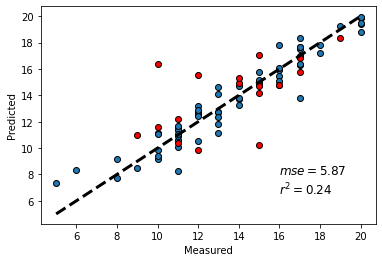

In [19]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=10)
#pls2.fit(X_norm, y_train)
pls2.fit(X_norm, y_train)
#PLSRegression()
Y_pred = pls2.predict(X_norm)
Y_pred_test = pls2.predict(X_norm_test)
fig, ax = plt.subplots()
ax.scatter(y_train, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, Y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(16,8, r"$mse = "+str(round(mean_squared_error(y_test, Y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(16,6.5, r"$r^2 = "+str(round(r2_score(y_test, Y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
#print('MSE = ' + str(round(mean_squared_error(y_test, Y_pred_test), 2)))

In [20]:
def optimise_pls(X, y, n_comp):
    
    # Definimos PLS y el número de componentes
    pls2 = PLSRegression(n_components=n_comp)
    #pls2 = PLSRegression(n_components=10)
    pls2.fit(X, y)
    Y_pred = pls2.predict(X)
    # Calculamos métricas
    r2 = r2_score(y, Y_pred)
    mse = mean_squared_error(y, Y_pred)
    rpd = y.std()/np.sqrt(mse)
    
    return (Y_pred, r2, mse, rpd)

In [21]:
# test with 40 components
r2s = []
mses = []
rpds = []
arr_comp = np.arange(1, 31)
for n_comp in arr_comp:
    Y_pred, r2, mse, rpd = optimise_pls(X_norm, y_train, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

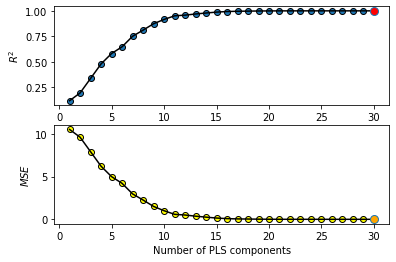

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

In [124]:
model=pls2.fit(X_norm, y_train)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut, StratifiedKFold, train_test_split, cross_validate, cross_val_score
loo = LeaveOneOut()
#X = df1['horsepower'].values.reshape(-1,1)
#y = df1['mpg'].values.reshape(-1,1)
loo.get_n_splits(X_norm)
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

scores = cross_val_score(model, X_norm, y_train, scoring="neg_mean_squared_error", cv=crossvalidation,
 n_jobs=1)

print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 10, MSE: 6.739740816368233, STD: 5.9387826522326685


In [125]:
# to demonstrate how the data are split, we will create 3 and 5 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [126]:
# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(yprop):
    print(train_index, test_index)

[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82] [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55] [56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82]


In [127]:
# to get the values from our data, we use np.take() to access a value at particular index
for train_index, test_index in kf3.split(xftir):
    print(np.take(xftir,train_index), np.take(xftir,test_index))

[0.01225536 0.01229481 0.01228755 0.01223893 0.01216186 0.01207684
 0.01201882 0.01202307 0.01211627 0.01229574 0.01252352 0.01274327
 0.01291152 0.0130285  0.01313195 0.01327425 0.01348852 0.01376589
 0.01406099 0.01430127 0.01442255 0.01439443 0.01423829 0.01402098
 0.01383022 0.01373439 0.01375833 0.01387653 0.01403032 0.01415401
 0.01420186 0.01415753 0.0140353  0.01386417 0.01367473 0.0134851
 0.0133027  0.01312796 0.0129677  0.01283344 0.01274589 0.01272142
 0.01276876 0.01288465 0.01306124 0.01328983 0.01356689 0.01389048
 0.0142535  0.01463543 0.01500353 0.01531753 0.01554325 0.01566158
 0.01567492] [0.0110966  0.01119915 0.01098486 0.01054341 0.01002245 0.00955765
 0.00923784 0.00908481 0.0090711  0.00914556 0.00926567 0.00940403
 0.00954942 0.00968954 0.00981006 0.00989108 0.00992538 0.00992208
 0.00991754 0.00995951 0.01009289 0.01033649 0.01067365 0.01105651
 0.01143135 0.01175163 0.01199488 0.01215925]
[0.0110966  0.01119915 0.01098486 0.01054341 0.01002245 0.00955765
 0.0

In [128]:
# to get the values from our data, we use np.take() to access a value at particular index
for train_index, test_index in kf3.split(xftir):
    print(np.take(yprop,train_index), np.take(yprop,test_index))

[20 16 13 15 13 14 13  5 11 12 18 15 17 16 17 12 17  8 17 17 17 17  6 17
 12 15 14 20 20 11 16 17 17 13 15 16 15 14 15 10 20 14 20 10  9 13 11 12
 13  8 10  9 11 12 11] [10 10 13 11 11 14 10 14 16 18 16 12 15 17 10 12 12 12 15 19 15 11 12 17
 11 11 16 19]
[10 10 13 11 11 14 10 14 16 18 16 12 15 17 10 12 12 12 15 19 15 11 12 17
 11 11 16 19 20 11 16 17 17 13 15 16 15 14 15 10 20 14 20 10  9 13 11 12
 13  8 10  9 11 12 11] [20 16 13 15 13 14 13  5 11 12 18 15 17 16 17 12 17  8 17 17 17 17  6 17
 12 15 14 20]
[10 10 13 11 11 14 10 14 16 18 16 12 15 17 10 12 12 12 15 19 15 11 12 17
 11 11 16 19 20 16 13 15 13 14 13  5 11 12 18 15 17 16 17 12 17  8 17 17
 17 17  6 17 12 15 14 20] [20 11 16 17 17 13 15 16 15 14 15 10 20 14 20 10  9 13 11 12 13  8 10  9
 11 12 11]


In [147]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
kf5 = KFold(n_splits=10, shuffle=False)
xftir_norm = preprocessing.normalize(xftir, norm='l1')# Normaliza los datos
#model = LogisticRegression(solver="liblinear", multi_class="auto")
model1=PLSRegression(n_components=10)
i = 1
for train_index, test_index in kf5.split(xftir_norm):
    X_train = xftir_norm[train_index]
    X_test = xftir_norm[test_index]
    y_train = yprop[train_index]
    y_test = yprop[test_index]
        
    #Train the model
    model1.fit(X_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model1.predict(X_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model1.predict(X_test))}")
    #print(train_index)
    #print(X_train)
    i += 1

MSE. 1 on the test set: 3.3775815076188556
R2. 1 on the test set: 0.2183311368082076
MSE. 2 on the test set: 17.93385490757357
R2. 2 on the test set: -1.6220979196993843
MSE. 3 on the test set: 3.8526180357752255
R2. 3 on the test set: 0.5108745126993836
MSE. 4 on the test set: 1.0229832728491182
R2. 4 on the test set: 0.8480952912706645
MSE. 5 on the test set: 15.632679966533455
R2. 5 on the test set: 0.0588038402087101
MSE. 6 on the test set: 6.0348300752962505
R2. 6 on the test set: 0.6757102226541057
MSE. 7 on the test set: 7.3807309473071205
R2. 7 on the test set: 0.2417868689764756
MSE. 8 on the test set: 12.673388456623318
R2. 8 on the test set: -6.510156122443448
MSE. 9 on the test set: 11.212062334754334
R2. 9 on the test set: 0.3398601753226519
MSE. 10 on the test set: 8.075776948052738
R2. 10 on the test set: -2.3131392607395846


In [143]:
# cross_validate allow to specify metrics which you want to see
for i, score in enumerate(cross_validate(model1, xftir_norm,yprop, cv=10)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.2183311368082076
Accuracy for the fold no. 1 on the test set: -1.6220979196993843
Accuracy for the fold no. 2 on the test set: 0.5108745126993836
Accuracy for the fold no. 3 on the test set: 0.8480952912706645
Accuracy for the fold no. 4 on the test set: 0.0588038402087101
Accuracy for the fold no. 5 on the test set: 0.6757102226541057
Accuracy for the fold no. 6 on the test set: 0.2417868689764756
Accuracy for the fold no. 7 on the test set: -6.510156122443448
Accuracy for the fold no. 8 on the test set: 0.3398601753226519
Accuracy for the fold no. 9 on the test set: -2.3131392607395846


In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [158]:
X=pd.DataFrame(X_norm)
y= pd.DataFrame(y_train)

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X)
    regr = model.fit()
    RSS = ((regr.predict(X) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [159]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

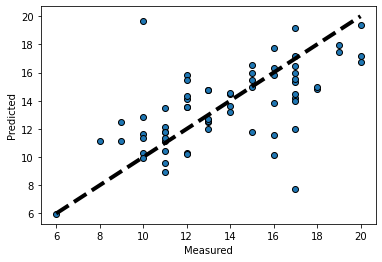

In [114]:
lr = PLSRegression(n_components=10)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_norm, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**<font color=green> Ahora podemos hacer una optimización variando el número de componentes y verificando cual tiene un mejor comportamiento.** 

In [40]:
def optimise_pls_cv(X, y, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)
    # Calculamos métricas
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [81]:
# test with 40 components
r2s = []
mses = []
rpds = []
arr_comp = np.arange(1, 41)
for n_comp in arr_comp:
    y_cv, r2, mse, rpd = optimise_pls_cv(X_norm, y_train, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

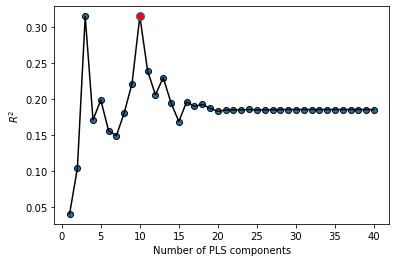

In [108]:
fig, ax = plt.subplots()
ax.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax.plot(arr_comp, r2s, 'k-')
plt.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax.set_xlabel('Number of PLS components')
ax.set_ylabel('$R^2$')
plt.show()

In [104]:
np.argmax(r2s), np.array(r2s)[9]

(9, 0.3152058066689315)

In [95]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=20, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

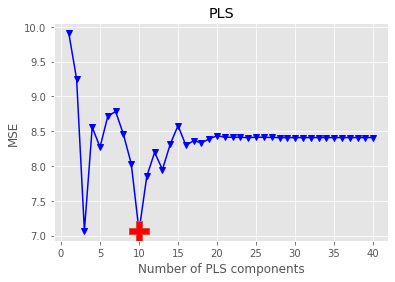

In [96]:
plot_metrics(mses, 'MSE', 'min')

Coefficients: 
 [[-24.01761989  -9.66088461  -1.28220081 ...   3.68542102   3.77278447
    3.74716891]]
Mean squared error: 9.86
Coefficient of determination: 0.30


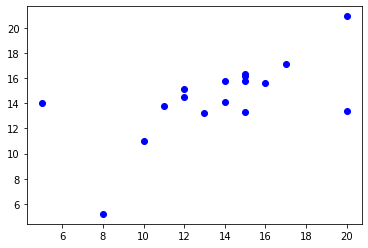

In [134]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % skm.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % skm.r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
plt.scatter(y_test, y_pred, color='blue')#, linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [169]:
X_norm

array([[4.04010532e-03, 4.07743996e-03, 3.99942028e-03, ...,
        2.73500928e-03, 2.73154934e-03, 2.72853590e-03],
       [4.49768975e-03, 4.50431950e-03, 4.49091687e-03, ...,
        1.43321849e-03, 1.43384360e-03, 1.43415616e-03],
       [6.35550259e-03, 6.21829789e-03, 6.08268070e-03, ...,
        4.33377541e-07, 2.02243940e-06, 4.33383264e-06],
       ...,
       [4.44339065e-03, 4.68660055e-03, 5.03582584e-03, ...,
        3.62643146e-03, 3.62837838e-03, 3.63071195e-03],
       [4.09183933e-03, 4.58934495e-03, 5.02455629e-03, ...,
        1.42324836e-03, 1.42156251e-03, 1.41925008e-03],
       [9.88788417e-03, 9.91320529e-03, 9.85474698e-03, ...,
        2.60573202e-06, 1.35950517e-06, 0.00000000e+00]])

In [158]:
XY1=pd.DataFrame(Y_pred)
XY=pd.DataFrame(yprop)
corr_test = scs.pearsonr(XY[0], XY1[0])
slope, intercept, r_value, p_value, std_err = scs.linregress(XY[0], XY1[0])
print ("slope:", slope)
print ("Intercept:", intercept)
print ("r-squared:", r_value**2)
print ("std_err:", std_err)

slope: 0.8177012741164835
Intercept: 2.51484386911598
r-squared: 0.8177012741164834
std_err: 0.042898948219395876


In [67]:
y.shape, X.shape

((442,), (442, 10))

In [45]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


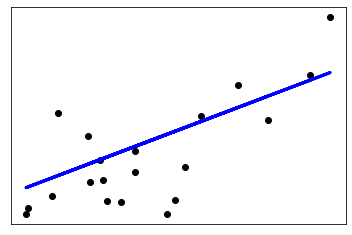

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [97]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


df = pd.read_csv('Hitters.csv')#.dropna().drop('Player', axis=1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

<p style="text-align:justify"><div class="alert alert-success">

## <font color=black> Error absoluto promedio (mean_absolute_error)
<font color=black> La función mean_absolute_error calcula el error absoluto medio y corresponde a una métrica que evalua el riesgo de error del modelo. 
Si $\hat{y}_i$ es el valor predicho de la muestra $i_{esima}$ y $y_i$ es la medida de esa misma muestra, entonces el error absoluto medio (MAE) sobre un numero de muestras $n_{samples}$ está definido por:
$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$$